# Vroom Pricing Analysis

In [414]:
import plotly 
import numpy as np
plotly.tools.set_credentials_file(username='crazysauce', api_key='p8s1f0pwcv')

In [395]:
df.head(10)

,Unnamed: 0,vehicleid,vin,make,model,year,vehicle_trim,miles,price,pvs,styleID,usedTMVRetail,price_diff
0,0,77221,1GYS3BKJ3FR227165,Cadillac,Escalade,2015,Luxury,34821,58980,161,200724942,61693,-2713
1,1,77301,JN1AZ0CP0BT007165,Nissan,LEAF,2011,SL,33795,7780,555,101300950,7803,-23
4,4,77607,TRUB3AFK7D1900415,Audi,TT RS,2013,2.5 quattro,26828,40480,273,200423953,42601,-2121
6,6,77847,WBAXG5C58DD229343,BMW,5 Series,2013,528i,47454,23480,125,200429165,27197,-3717
8,8,77914,WA1EFCFS1FR005382,Audi,Q3,2015,2.0T quattro Premium Plus,10320,30780,283,101254337,27876,2904
9,9,78163,WDCTG4GB9FJ094304,Mercedes-Benz,GLA,2015,GLA250 4MATIC,12536,29480,130,200706471,26202,3278
10,10,78326,5TFUW5F15DX276328,Toyota,Tundra,2013,Grade,51007,26480,271,200439178,24208,2272
11,11,78457,1ZVBP8CH0A5110813,Ford,Mustang,2010,GT Premium,16300,20980,231,101144375,19825,1155
12,12,78467,WDDPK7FAXDF068929,Mercedes-Benz,SLK,2013,SLK55 AMG,29228,42980,230,200433343,25348,17632
13,13,78487,WBAYB6C52DC998029,BMW,7 Series,2013,750i xDrive,45450,38480,85,200429884,41382,-2902


In [514]:
#Prep the data
import pandas as pd
df = pd.read_csv('vroom_pricecomp')
df['price_diff'] = df['price'] - df['usedTMVRetail']
df_pricecomp = df[['year','price','usedTMVRetail','price_diff','pvs']]

group_mean = df_pricecomp.groupby(df_pricecomp.year).mean()

print group['year'].agg(['count','sum','min','max','mean','std'])

years = ['2008','2009','2010','2011','2012','2013','2014','2015','2016']

      count     sum   min   max  mean  std
year                                      
2008      1    2008  2008  2008  2008  NaN
2009      2    4018  2009  2009  2009    0
2010      3    6030  2010  2010  2010    0
2011      7   14077  2011  2011  2011    0
2012      9   18108  2012  2012  2012    0
2013     35   70455  2013  2013  2013    0
2014     44   88616  2014  2014  2014    0
2015     78  157170  2015  2015  2015    0
2016     21   42336  2016  2016  2016    0


In [530]:
import plotly.plotly as py
from plotly.graph_objs import *

trace0 = go.Bar(

    name = 'Vroom Price',
    x= years,
    y= list(group_mean['price'])
)
trace1 = go.Bar(
    name = 'Edmunds Price',
    x= years,
    y= list(group_mean['usedTMVRetail'])
)
data = [trace0, trace1]
layout = go.Layout(
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')


In [516]:
df_make = df[['make','price','usedTMVRetail','price_diff','miles','pvs']]
make_mean = df_make.groupby(df_make.make).mean().sort_values(by=['price'], ascending=[True])
make = list(make_mean.index)

trace0 = go.Bar(
    name = 'Vroom Price',
    x= make,
    y= list(make_mean['price'])
)
trace1 = go.Bar(
    name = 'Edmunds Price',
    x= make,
    y= list(make_mean['usedTMVRetail'])
)
data = [trace0, trace1]
layout = go.Layout(
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

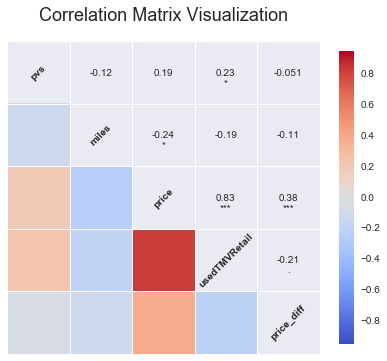

In [527]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

fig = plt.figure(figsize=(7,7))
sns.corrplot(df_total[['pvs','miles','price','usedTMVRetail','price_diff']])
plt.title("Correlation Matrix Visualization",fontsize=18)

In [534]:
make_pvs = df_make.groupby(df_make.make).mean().sort_values(by=['price_diff'], ascending=[True])
make = list(make_pvs.index)

trace0 = go.Bar(
    name = 'Page Views',
    x= make,
    y= list(make_pvs['pvs'])
)
trace1 = go.Bar(
    name = 'Price Difference (Vroom Price - Edmunds Price)',
    x= make,
    y= list(make_pvs['price_diff'])
)
data = [trace0, trace1]
layout = go.Layout(
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

In [535]:
make_pvs = df_make.groupby(df_make.make).mean().sort_values(by=['pvs'], ascending=[True])
make = list(make_pvs.index)

trace0 = go.Bar(
    name = 'Page Views',
    x= make,
    y= list(make_pvs['pvs'])
)
trace1 = go.Bar(
    name = 'Price Difference (Vroom Price - Edmunds Price)',
    x= make,
    y= list(make_pvs['price_diff'])
)
data = [trace0, trace1]
layout = go.Layout(
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

In [533]:
trace = go.Scatter(
    x = list(df['price_diff']),
    y = list(df['pvs']),
    mode = 'markers'
)

layout = go.Layout(
    title='Price Differences/Page Views Comparison',
    xaxis=dict(
        title='Price Differences',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Page Views',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)
fig = go.Figure(data=[trace], layout=layout)

py.iplot(fig, filename='basic-scatter')

In [410]:
from sklearn import linear_model

df = df.dropna()
make_dummy = df['make']
year_dummy = df['year']
make_dummy = pd.get_dummies(make_dummy)
year_dummy = pd.get_dummies(year_dummy)
features = df[['pvs','miles']]
df_total = pd.concat([df, year_dummy, make_dummy],axis=1, join_axes=[features.index])
X_vrm = pd.concat([features, year_dummy, make_dummy],axis=1, join_axes=[features.index])
y_vrm = pd.Series(df.price_diff, name='Price_Difference')

In [392]:
from sklearn import linear_model
import numpy as np
import statsmodels.api as sm

model = sm.OLS(y_vrm, X_vrm).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Price_Difference   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     1.332
Date:                Sun, 05 Jun 2016   Prob (F-statistic):              0.124
Time:                        17:47:19   Log-Likelihood:                -1627.2
No. Observations:                 160   AIC:                             3332.
Df Residuals:                     121   BIC:                             3452.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
pvs               3.0351      7.423      0.409      0.683       -11.660    17.730
miles            -0.1297      0.054     -2.384      0.019        -0.237    -0.022
2008           4205.3703   3941.612      1.067      0.288     -3598.090   1.2e+04
2009           8457.1255   5977.727      1.415      0.160     -3377.361  2.03e+04
2010           2237.4709   5700.887      0.392      0.695     -9048.939  1.35e+04
2011           5650.1284   4211.117      1.342      0.182     -2686.889   1.4e+04
2012           4251.0380   3427.438      1.240      0.217     -2534.480   1.1e+04
2013           6167.7956   2240.026      2.753      0.007      1733.074  1.06e+04
2014           2661.9540   1892.963      1.406      0.162     -1085.665  6409.573
2015           2887.6295   1604.924      1.799      0.074      -289.740  6064.999
2016          -2569.5933   2851.031     -0.901      0.369     -8213.962  3074.776
Acura         -2555.7062   4224.377     -0.605      0.546     -1.09e+04  5807.561
Audi          -2631.0489   2722.869     -0.966      0.336     -8021.687  2759.589
BMW            -635.6789   2584.111     -0.246      0.806     -5751.608  4480.250
Buick         -2818.4637   5098.490     -0.553      0.581     -1.29e+04  7275.341
Cadillac        328.0285   3767.687      0.087      0.931     -7131.102  7787.159
Chevrolet       478.4534   1834.722      0.261      0.795     -3153.863  4110.770
Chrysler      -2595.4782   5130.366     -0.506      0.614     -1.28e+04  7561.435
Dodge          1818.3345   2385.298      0.762      0.447     -2903.992  6540.661
Ford           8090.4022   1743.942      4.639      0.000      4637.810  1.15e+04
GMC            8597.4414   2888.782      2.976      0.004      2878.335  1.43e+04
Honda          1963.5774   3421.265      0.574      0.567     -4809.720  8736.874
Hyundai        1784.3899   4178.093      0.427      0.670     -6487.247  1.01e+04
Infiniti      -2442.2545   2865.720     -0.852      0.396     -8115.703  3231.194
Jaguar         1.522e+04   7198.359      2.115      0.036       973.049  2.95e+04
Jeep           2486.2865   2853.999      0.871      0.385     -3163.958  8136.531
Kia             -87.7579   4308.533     -0.020      0.984     -8617.635  8442.120
Lexus           268.8028   3648.049      0.074      0.941     -6953.473  7491.079
Lincoln        -139.0580   3710.777     -0.037      0.970     -7485.521  7207.405
Mazda         -3926.4732   7527.884     -0.522      0.603     -1.88e+04   1.1e+04
Mercedes-Benz  4251.6480   2586.463      1.644      0.103      -868.937  9372.233
Nissan        -1960.6738   4405.641     -0.445      0.657     -1.07e+04  6761.454
Porsche        -605.3892   4429.131     -0.137      0.892     -9374.022  8163.244
Ram            7651.9676   3111.210      2.459      0.015      1492.506  1.38e+04
Scion          -666.2303   5175.889     -0.129   

In [394]:
model2 = sm.OLS(y_vrm, X_vrm['pvs']).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Price_Difference   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     10.32
Date:                Sun, 05 Jun 2016   Prob (F-statistic):            0.00159
Time:                        17:49:49   Log-Likelihood:                -1660.6
No. Observations:                 160   AIC:                             3323.
Df Residuals:                     159   BIC:                             3326.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
pvs           11.0300      3.434      3.212      0.002         4.249    17.811
==============================================================================
Omnibus:                       19.782   Durbin-Watson:                   1.825
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.486
Skew:                           0.518   Prob(JB):                     3.61e-10
Kurtosis:                       5.335   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [493]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   
from sklearn.grid_search import GridSearchCV

train = pd.concat([X_vrm, y_vrm],axis=1, join_axes=[X_vrm.index])
target = 'Price_Difference'

In [494]:
def modelfit(alg, target,dtrain, predictors, useTrainCV=True, cv_folds=5, early_stopping_rounds=25):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds, show_progress=False)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print "\nModel Report"
    print "Accuracy : %.4g" % metrics.accuracy_score(dtrain[target].values, dtrain_predictions)
    print "AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[target], dtrain_predprob)
                    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

In [495]:
predictors = [x for x in train.columns if x not in [target]]

xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=25,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=1,
 colsample_bytree=1,
 objective= 'reg:linear',
 nthread=4,
 scale_pos_weight=1,
 seed=5)

modelfit(xgb1, target, train, predictors)

ValueError: Check your params.Early stopping works with single eval metric only.

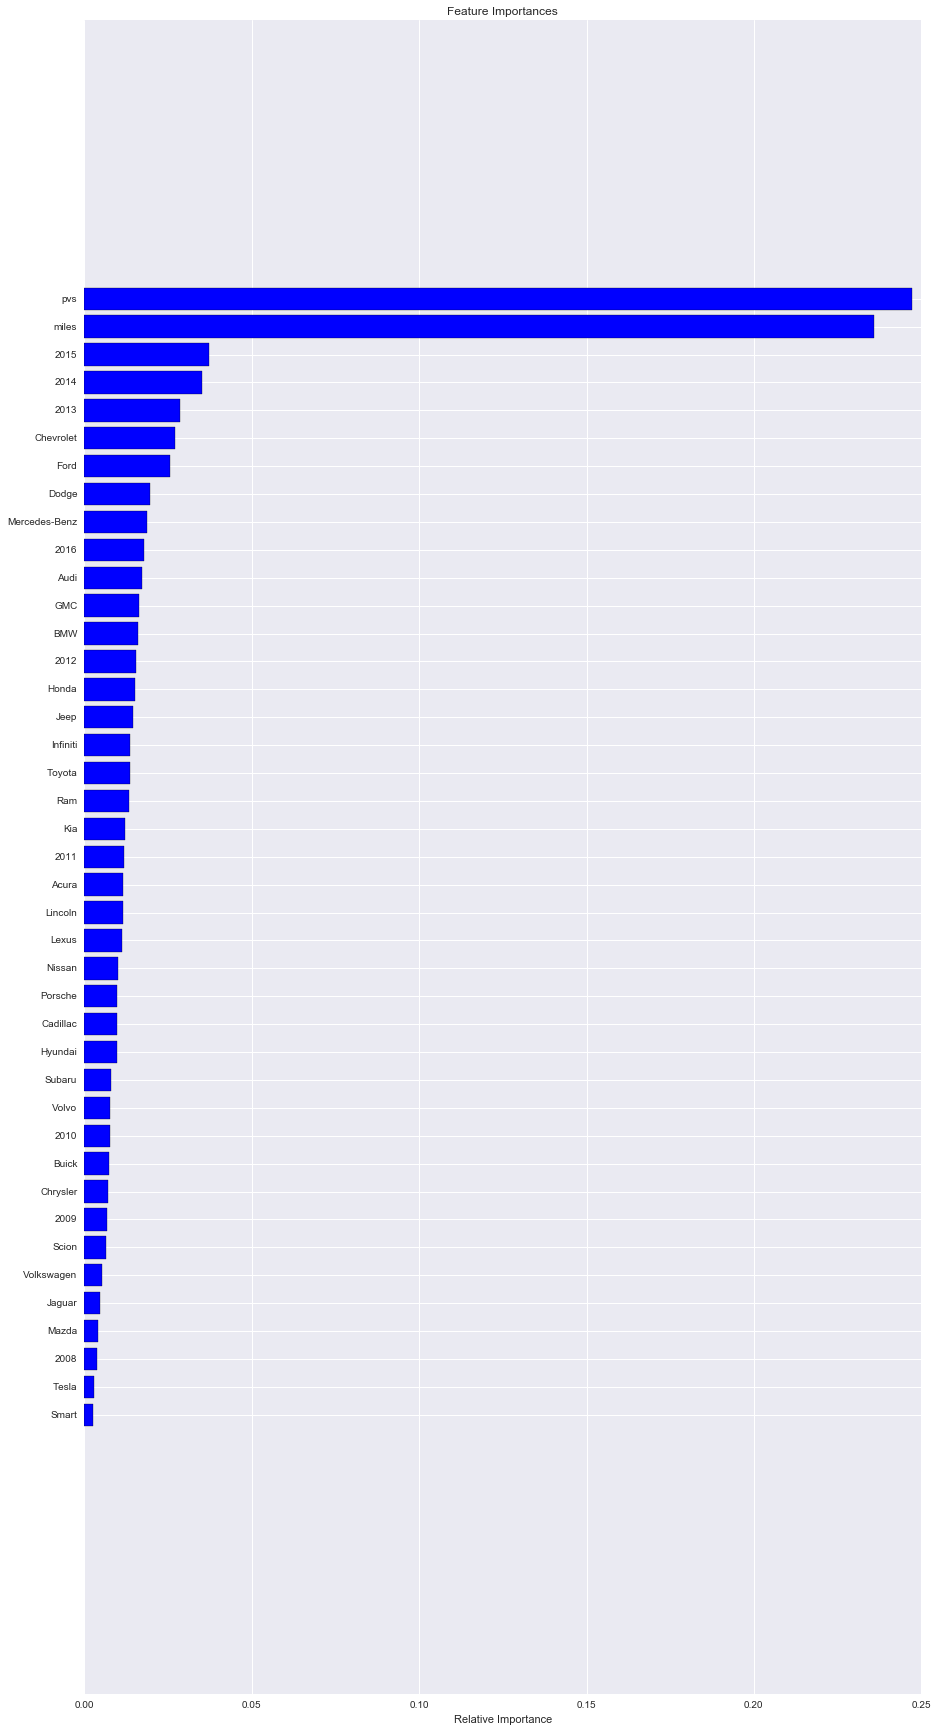

In [510]:
from sklearn.ensemble import RandomForestClassifier as RFC
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
 
train, test = df[df['is_train']==True], df[df['is_train']==False]
features = X_vrm.columns[0:]

forest = RFC(n_jobs=2,n_estimators=50)
y, _ = pd.factorize(y_vrm)
forest.fit(X_vrm, y_vrm)
 
importances = forest.feature_importances_
indices = np.argsort(importances)
 
plt.figure(figsize=(15,30))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')